In [259]:
import warnings
import pandas as pd

warnings.filterwarnings('ignore')

In [260]:
data = pd.read_csv('car data.csv')
data

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [261]:
#Summarizes the dataset's structure, including data types and non-null values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [262]:
#Calculates the number of missing values in each column.
data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [263]:
import datetime

date_time = datetime.datetime.now()
data['Age'] = date_time.year - data['Year']

#Drops the Year column from the dataset
data.drop('Year', axis=1, inplace=True)


<Axes: ylabel='Selling_Price'>

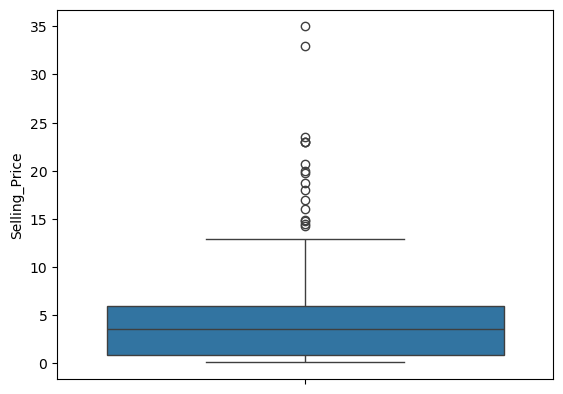

In [264]:
import seaborn as sns

sns.boxplot(data['Selling_Price'])

In [265]:
#Sorts the Selling_Price column in descending order.
sorted(data['Selling_Price'], reverse=True)

[35.0,
 33.0,
 23.5,
 23.0,
 23.0,
 23.0,
 20.75,
 19.99,
 19.75,
 18.75,
 18.0,
 17.0,
 16.0,
 14.9,
 14.73,
 14.5,
 14.25,
 12.9,
 12.5,
 11.75,
 11.5,
 11.45,
 11.25,
 11.25,
 11.25,
 10.9,
 10.25,
 10.11,
 9.7,
 9.65,
 9.5,
 9.25,
 9.25,
 9.25,
 9.15,
 9.1,
 8.99,
 8.75,
 8.65,
 8.55,
 8.5,
 8.4,
 8.4,
 8.35,
 8.25,
 8.25,
 7.9,
 7.75,
 7.75,
 7.75,
 7.5,
 7.5,
 7.5,
 7.45,
 7.45,
 7.45,
 7.4,
 7.25,
 7.25,
 7.2,
 7.05,
 6.95,
 6.85,
 6.75,
 6.7,
 6.6,
 6.5,
 6.5,
 6.45,
 6.4,
 6.25,
 6.25,
 6.15,
 6.1,
 6.0,
 6.0,
 6.0,
 6.0,
 5.95,
 5.95,
 5.9,
 5.85,
 5.85,
 5.8,
 5.75,
 5.75,
 5.65,
 5.5,
 5.5,
 5.5,
 5.5,
 5.5,
 5.4,
 5.4,
 5.35,
 5.3,
 5.3,
 5.25,
 5.25,
 5.25,
 5.25,
 5.25,
 5.25,
 5.25,
 5.2,
 5.15,
 5.11,
 5.0,
 4.95,
 4.95,
 4.9,
 4.9,
 4.85,
 4.8,
 4.8,
 4.75,
 4.75,
 4.75,
 4.75,
 4.75,
 4.75,
 4.65,
 4.6,
 4.5,
 4.5,
 4.5,
 4.5,
 4.5,
 4.5,
 4.5,
 4.4,
 4.4,
 4.4,
 4.35,
 4.15,
 4.1,
 4.1,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 3.95,
 3.95,
 3.9,
 3.9,
 3.8,
 3.75,
 3.75,
 3.6

In [266]:
#Removes rows with Selling_Price between 33 and 35.
data = data[~((data['Selling_Price']>=33.0) & (data['Selling_Price']<=35.0))]

In [267]:
#Outputs the unique values for Fuel_Type, Seller_Type, and Transmission.
print(data['Fuel_Type'].unique())
print(data['Seller_Type'].unique())
print(data['Transmission'].unique())

['Petrol' 'Diesel' 'CNG']
['Dealer' 'Individual']
['Manual' 'Automatic']


In [268]:
#Maps string values to integers
data['Fuel_Type'] = data['Fuel_Type'].map({'Petrol': 0, 'Diesel': 1, 'CNG': 2})
data['Seller_Type'] = data['Seller_Type'].map({'Dealer': 0, 'Individual': 1})
data['Transmission'] = data['Transmission'].map({'Manual': 0, 'Automatic': 1})

In [269]:
#Splits the data into features (x) and target variable (y).
x = data.drop(['Car_Name', 'Selling_Price'], axis=1)  # Input features
y = data['Selling_Price']                            # Target variable

In [270]:
from sklearn.model_selection import train_test_split

#Splits the dataset into training (80%) and testing (20%) sets.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

# Train Models

In [272]:
#Imports machine learning models.
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

In [273]:
#Trains a Linear Regression model.
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [274]:
#Trains a Random Forest Regressor.
rf = RandomForestRegressor()
rf.fit(x_train,y_train)

RandomForestRegressor()

In [275]:
#Trains a Gradient Boosting Regressor.
xgb = GradientBoostingRegressor()
xgb.fit(x_train,y_train)

GradientBoostingRegressor()

In [276]:
#Trains an XGBoost Regressor.
xg = XGBRegressor()
xg.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [277]:
#Each model generates predictions 

y_pred1 = lr.predict(x_test)
y_pred2 = rf.predict(x_test)
y_pred3 = xgb.predict(x_test)
y_pred4 = xg.predict(x_test)

In [278]:
# Calculate R² Scores
from sklearn import metrics

score1 = metrics.r2_score(y_test, y_pred1)
score2 = metrics.r2_score(y_test, y_pred2)
score3 = metrics.r2_score(y_test, y_pred3)
score4 = metrics.r2_score(y_test, y_pred4)

#The R² score measures how well the predictions match the true values (higher is better, with a maximum of 1).

<Axes: xlabel='Model', ylabel='R2_score3'>

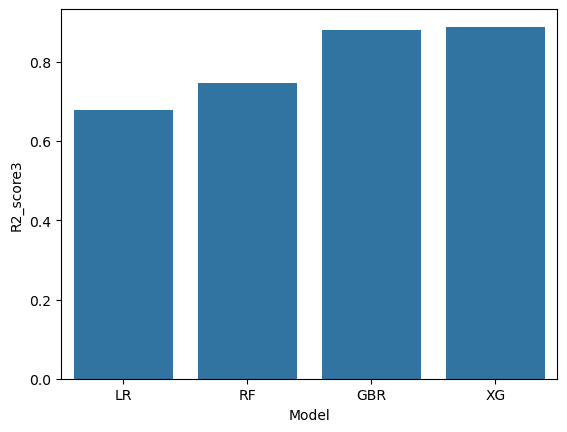

In [279]:
final_data = pd.DataFrame({'Model':['LR','RF','GBR','XG'],'R2_score3':[score1,score2,score3,score4]})

#sns.barplot(final_data['Model'],final_data['R2_score3'])
sns.barplot(x='Model', y='R2_score3', data=final_data)

In [280]:
print(final_data)


  Model  R2_score3
0    LR   0.679088
1    RF   0.746311
2   GBR   0.881491
3    XG   0.888747


In [281]:
#  XGBoost Regressor is best Rehression model
xg = XGBRegressor()
xg_final = xg.fit(x,y)

In [282]:
import joblib
joblib.dump(xg_final,'car_price_predictor')
model = joblib.load('car_price_predictor')

In [283]:
#prediction on new data

import pandas as pd
data_new = pd.DataFrame({
    'Present_Price':5.59,
    'Kms_Driven':27000,
    'Fuel_Type':0,
    'Seller_Type':0,
    'Transmission':0,
    'Owner':0,
    'Age':8
},index=[0])

model.predict(data_new)

array([3.4819746], dtype=float32)

# GUI

In [285]:
from tkinter import *
import joblib

def show_entry_fields():
    p1=float(e1.get())
    p2=float(e2.get())
    p3=float(e3.get())
    p4=float(e4.get())
    p5=float(e5.get())
    p6=float(e6.get())
    p7=float(e7.get())
    
    model = joblib.load('car_price_predictor')
    data_new = pd.DataFrame({
    'Present_Price':p1,
    'Kms_Driven':p2,
    'Fuel_Type':p3,
    'Seller_Type':p4,
    'Transmission':p5,
    'Owner':p6,
    'Age':p7
},index=[0])
    result=model.predict(data_new)
    Label(master, text="Car Purchase amount").grid(row=8)
    Label(master, text=result).grid(row=10)
    print("Car Purchase amount", result[0])
    
master = Tk()
master.title("Car Price Prediction Using Machine Learning")
label = Label(master, text = "Car Price Prediction Using Machine Learning"
                          , bg = "black", fg = "white"). \
                               grid(row=0,columnspan=2)


Label(master, text="Present_Price").grid(row=1)
Label(master, text="Kms_Driven").grid(row=2)
Label(master, text="Fuel_Type").grid(row=3)
Label(master, text="Seller_Type").grid(row=4)
Label(master, text="Transmission").grid(row=5)
Label(master, text="Owner").grid(row=6)
Label(master, text="Age").grid(row=7)


e1 = Entry(master)
e2 = Entry(master)
e3 = Entry(master)
e4 = Entry(master)
e5 = Entry(master)
e6 = Entry(master)
e7 = Entry(master)


e1.grid(row=1, column=1)
e2.grid(row=2, column=1)
e3.grid(row=3, column=1)
e4.grid(row=4, column=1)
e5.grid(row=5, column=1)
e6.grid(row=6, column=1)
e7.grid(row=7, column=1)


Button(master, text='Predict', command=show_entry_fields).grid()

mainloop()

In [286]:
xg_final.save_model('xgb_model.json')